# Regresión lineal y descenso de gradiente con Python

## Importar librerías

In [35]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Generar datos sintéticos

In [55]:
def gen_data(num_points, bias, variance):
    x = np.linspace(0, 10, num_points)
    y = (x * 2) + bias + np.random.normal(0, variance, num_points)
    return x, y

In [37]:
## Generar datos calificacion de estudiantes vs horas de estudio

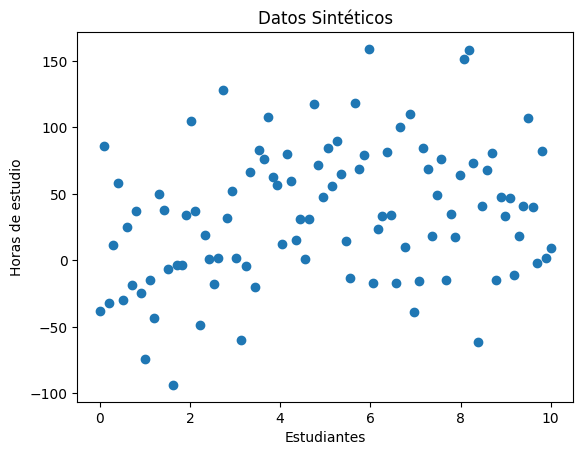

In [56]:
num_points = 100
x, y = gen_data(num_points, 25, 50)
plt.scatter(x, y)
plt.xlabel('Estudiantes')
plt.ylabel('Horas de estudio')
plt.title('Datos Sintéticos')
plt.show()

## Aplicamos Regresion Lineal
`y = a + b * x`

In [43]:
def compute_error_for_line_given_points(n, b, m, x_points, y_points):
    totalError = 0
    for i in range(0, n):
        x_point = x_points[i]
        y_point = y_points[i]
        totalError += (y_point - (m * x_point + b)) ** 2
    return totalError / float(n)

def step_gradient(b_current, m_current, x_points, y_points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = len(x_points)
    for i in range(0, N):
        x = x_points[i]
        y = y_points[i]
        b_gradient += -(2/float(N)) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/float(N)) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return new_b, new_m

def gradient_descent_runner(x_points, y_points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(0, num_iterations):
        b, m = step_gradient(b, m, x_points, y_points, learning_rate)
    return b, m

Recta ajustada: y = 6.13x + 1.42
Error final: 2440.4555922474565


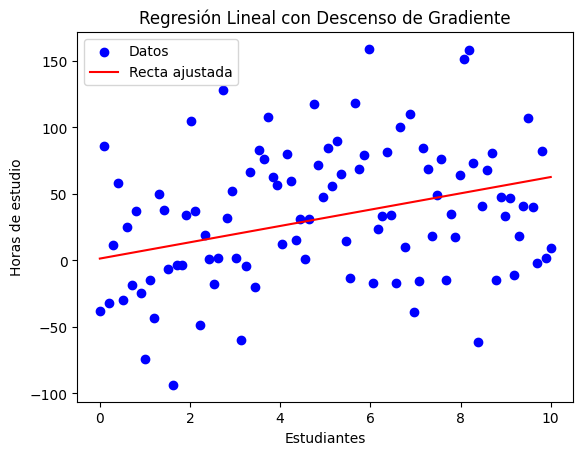

In [66]:
learning_rate = 1e-4 # Tasa de aprendizaje
initial_b = 0 # Intersección inicial
initial_m = 0 # Pendiente inicial
num_iterations = 1000 # Número de iteraciones
x_points = np.array(x)
y_points = np.array(y)
# Entrenamiento
b, m = gradient_descent_runner(x_points, y_points, initial_b, initial_m, learning_rate, num_iterations)

print(f"Recta ajustada: y = {m:.2f}x + {b:.2f}")
print("Error final:", compute_error_for_line_given_points(len(x_points), b, m, x_points, y_points))
plt.scatter(x_points, y_points, color="blue", label="Datos")
plt.plot(x_points, m * x_points + b, color="red", label="Recta ajustada")
plt.xlabel('Estudiantes')
plt.ylabel('Horas de estudio')
plt.title('Regresión Lineal con Descenso de Gradiente')
plt.legend()
plt.show()